In [117]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Problem Statement

This is a simple prediction to be performed to detect which user might purchase a social network Ads.


-- Social Network Ads (Advertisement) Analysis:

	* Problem statement:
		
		XYZ comapany is a company that is involved in retail and wholesale distribution of goods to it's customers.
		This company has been in successful in distribution over the years and with it's latest product release, the manager has hired
		you to analyse based on the company's past data which user is going to buy their product displayed on social media advertisement.
			
	* Columns (feature)
			- UserID
			- Gender
			- Age
			- Estimated Salary (based on email i.e just estimation on ur job profile)
			- Purchased


In [118]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [119]:
# Checking the shape of the datasets

df.shape

(400, 5)

In [120]:
# Checking the different features

df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [121]:
# Checking for missing values

df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

No missing values so the dataset is ready for Analysis!

In [122]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [123]:
# The target variable being 'purchased' let's analyse that

df.Purchased.unique()

array([0, 1])

--> Only two unique values in this column
    * 0: Represents not purchased
    * 1: Represent purchased
    
    
    ___________________________________________________________________________________________________________
 
 
 

In [124]:
len(df['User ID'].unique())

400

# Feature engineering

In this prediction analysis, the userID column will not be needed because all the user IDs are unique and therefore doesnt affect the target variable. So we drop the column

In [125]:
df2 = df.drop('User ID', axis = 'columns')
df2.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [126]:
len(df2[df2['Gender'] == 'Male']) + len(df2[df2['Gender'] == 'Female'])

400

To check the relationship between the genders adn the salary

In [127]:
import numpy as np

Male_salary = df2['EstimatedSalary'][df2['Gender'] == 'Male']

Female_Salary = df2['EstimatedSalary'][df2['Gender'] == 'Female']

In [128]:
len(Male_salary)

196

In [129]:
len(Female_Salary)

204

In [130]:
196  + 204

400

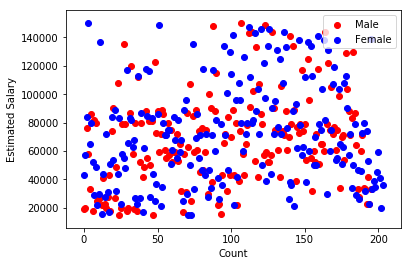

In [131]:
plt.xlabel('Count')
plt.ylabel('Estimated Salary')
plt.scatter(np.arange(len(Male_salary)), Male_salary, color = 'red', label = 'Male')
plt.scatter(np.arange(len(Female_Salary)), Female_Salary, color = 'blue', label = 'Female')
plt.legend();


There's no obvious correlation between both genders and the estimated salary. They're both evenly distributed, Both having same tendency to recieve high and low salaries

In [132]:
df2.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


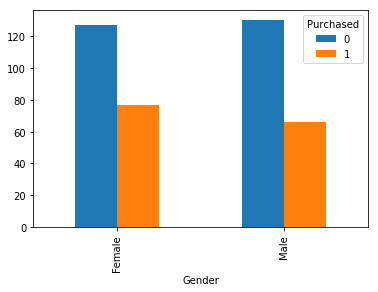

In [133]:
pd.crosstab(df2['Gender'], df2['Purchased']).plot(kind = 'bar');

In [134]:
# Number of males whom didn't purchase

len(df2[df2['Gender'] == 'Male'][df2['Purchased'] == 0] )

/home/spades/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


130

In [135]:
# Number of Males whom purchased

len(df2[df2['Gender'] == 'Male'][df2['Purchased'] == 1] )

/home/spades/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


66

In [136]:
# Number of females whom didn't purchase

len(df2[df2['Gender'] == 'Female'][df2['Purchased'] == 0] )

/home/spades/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


127

In [137]:
# Number of females whom purchased

len(df2[df2['Gender'] == 'Female'][df2['Purchased'] == 1] )

/home/spades/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


77

_____________________________________________________________________________________________________________________

from the above visuals and filterings, there are no significant differences between the genders on whom made more purchases and whom didn't.

Now to find correlation between the age and purchased

_________________________________________________________________________________________________________


In [138]:
df2.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [139]:
# Basic statistics of the Ages

df2['Age'].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

In [140]:
# Grouping the ages into bins

bins = [0,20,26,40,70]
groups = ['Young/Teens','Youths','Adults','Seniors']

df2['Age_cut'] = pd.cut(df2['Age'], bins  = bins, labels = groups)
df2.head()

,Gender,Age,EstimatedSalary,Purchased,Age_cut
0,Male,19,19000,0,Young/Teens
1,Male,35,20000,0,Adults
2,Female,26,43000,0,Youths
3,Female,27,57000,0,Adults
4,Male,19,76000,0,Young/Teens


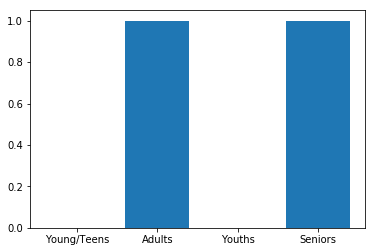

In [141]:
plt.bar(df2['Age_cut'], df2['Purchased']);

In [142]:
for i in range(18,22,1):
    print(df2[df2['Age'] == i])

     Gender  Age  EstimatedSalary  Purchased      Age_cut
14     Male   18            82000          0  Young/Teens
51   Female   18            44000          0  Young/Teens
76     Male   18            52000          0  Young/Teens
141  Female   18            68000          0  Young/Teens
165  Female   18            86000          0  Young/Teens
     Gender  Age  EstimatedSalary  Purchased      Age_cut
0      Male   19            19000          0  Young/Teens
4      Male   19            76000          0  Young/Teens
104  Female   19            21000          0  Young/Teens
139    Male   19            25000          0  Young/Teens
140    Male   19            85000          0  Young/Teens
191  Female   19            26000          0  Young/Teens
193    Male   19            70000          0  Young/Teens
     Gender  Age  EstimatedSalary  Purchased      Age_cut
12     Male   20            86000          0  Young/Teens
72   Female   20            23000          0  Young/Teens
82     Male   

From the above analysis It seems the <b>Young, teens and youth</b> whom are from the ages of 18 to 21 are likely not to purchase the social netword ads. But the other groups of <b>adults and seniors</b> are more likely to purchase the ads.

--------------------------------------------------------------------------------------------------------

But let's see if it has anything to do with their estimated salaries

In [143]:
df2[['EstimatedSalary', 'Age_cut']].head(10)

,EstimatedSalary,Age_cut
0,19000,Young/Teens
1,20000,Adults
2,43000,Youths
3,57000,Adults
4,76000,Young/Teens
5,58000,Adults
6,84000,Adults
7,150000,Adults
8,33000,Youths
9,65000,Adults


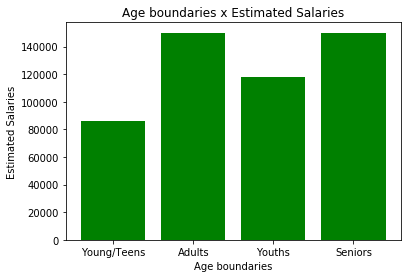

In [144]:
plt.title('Age boundaries x Estimated Salaries')
plt.xlabel('Age boundaries')
plt.ylabel('Estimated Salaries')
plt.bar(df2['Age_cut'], df2['EstimatedSalary'], color = 'green');

With the above visual, <b>Young/Teens and Youth</b> seem to have a relatively almost as half lower salary than the remainng age groups. So this could be the reason why they dont purchase these ads

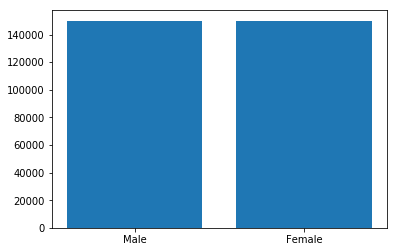

In [145]:
plt.bar(df2['Gender'], df2['EstimatedSalary']);

Also gender wise both genders have relatively high amounts of salaries

In [146]:
# Checking the highest salary recieved by a Male

df2[(df.Gender == 'Male') & (df2['EstimatedSalary'] == df2['EstimatedSalary'].max())]

,Gender,Age,EstimatedSalary,Purchased,Age_cut
211,Male,52,150000,1,Seniors


In [147]:
# Checking the highest salary recieved by a female

df2[(df.Gender == 'Female') & (df2['EstimatedSalary'] == df2['EstimatedSalary'].max())]

,Gender,Age,EstimatedSalary,Purchased,Age_cut
7,Female,32,150000,1,Adults


Both reports show the males and females recieved the highest cut of the largest estimated salary.


_________________________________________________________________________________________________________


But to view them Age bondary wise:

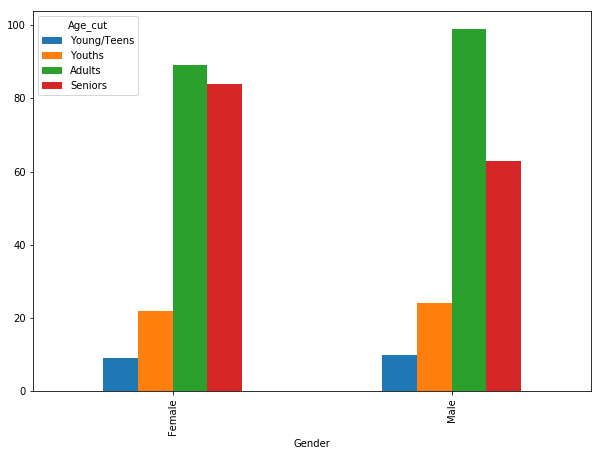

In [148]:
plt.rcParams['figure.figsize'] = (10,7)
pd.crosstab(df2['Gender'], df2['Age_cut']).plot(kind='bar');

The frequency distribution of high income earners (Adult and Seniors) in both genders are relatively high so it's safe to say the estimated salary for both genders are evenly distributed.

_________________________________________________________________________________________________________


With the last analysis it migh conclude that people of higher ages are more likely to purchase the social network ads due to their high salaries


_______________________________________________________________________________________________________________

#  Machine learning

In [149]:
df2.head()

,Gender,Age,EstimatedSalary,Purchased,Age_cut
0,Male,19,19000,0,Young/Teens
1,Male,35,20000,0,Adults
2,Female,26,43000,0,Youths
3,Female,27,57000,0,Adults
4,Male,19,76000,0,Young/Teens


Preparing the dataframe for machine learning processing. By converting the categorical column into encoded forms

In [150]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df2['Gender'] = le.fit_transform(df2['Gender'])
df2.head()

,Gender,Age,EstimatedSalary,Purchased,Age_cut
0,1,19,19000,0,Young/Teens
1,1,35,20000,0,Adults
2,0,26,43000,0,Youths
3,0,27,57000,0,Adults
4,1,19,76000,0,Young/Teens


 After conversion :
     --> Male: 1
     --> Female: 2
     
_________________________________________________________________________________________________________

# Split the data




In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_train, y_test = train_test_split(df2[['Gender', 'Age', 'EstimatedSalary']], df['Purchased'], test_size = 0.2, random_state = 10)

In [153]:
len(X_test)

80

# import the machine learning model

In [154]:
# First using logistic regression model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [155]:
lr.score(X_test, y_test)

0.65

With a not so high accuracy we'll try decision tree

In [156]:
from sklearn import tree

In [157]:
tr = tree.DecisionTreeClassifier()
tr.fit(X_train,  y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [158]:
tr.score(X_test, y_test)

0.9

In [159]:
df2.head()

,Gender,Age,EstimatedSalary,Purchased,Age_cut
0,1,19,19000,0,Young/Teens
1,1,35,20000,0,Adults
2,0,26,43000,0,Youths
3,0,27,57000,0,Adults
4,1,19,76000,0,Young/Teens


In [160]:
y_test.head()

332    0
111    0
352    1
205    0
56     0
Name: Purchased, dtype: int64

In [161]:

     #Gender, Age, Estimated_salary

tr.predict([[1,3,2000000]])

array([1])

# Models summary:
        
        --> Logistic Regression 65% Accuracy
        --> Decision Tree Classifier 88% Accuracy

In [164]:
Male = df[df['Gender'] == 'Male']
Female = df[df['Gender'] == 'Female']

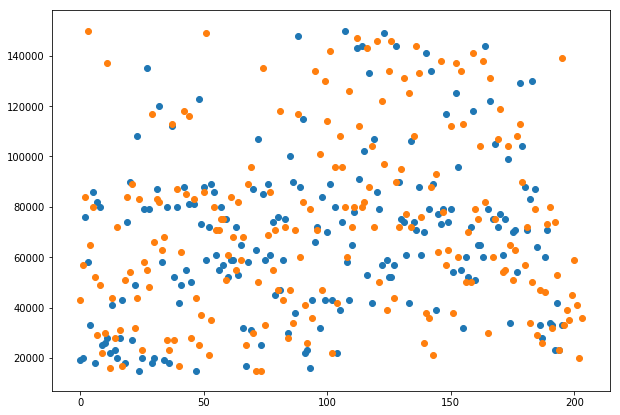

In [172]:
plt.scatter(np.arange(len(Male['Gender'])), Male['EstimatedSalary'])
plt.scatter(np.arange(len(Female['Gender'])), Female['EstimatedSalary'])